In [1]:
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

# Clustering of Languages Based on Time and Strace

In [8]:
data = pandas.read_csv('language-times.tsv',sep='\t',index_col=0)
data.index = [x.replace('hello-world-','') for x in data.index.tolist()]
X_norm = (data - data.min())/(data.max() - data.min())
X_norm = X_norm.fillna(0)
X_norm.transpose()
X_norm=X_norm.loc[:,X_norm.sum()!=0]
X_norm

,wait4_time,wait4_seconds,wait4_usecs/call,stat_time,stat_seconds,stat_errors,fstat_time,fstat_seconds,fstat_calls,read_time,...,lseek_time,lseek_seconds,lseek_calls,mmap_calls,munmap_calls,ioctl_calls,ioctl_errors,clone_time,clone_seconds,clone_usecs/call
ruby,0.5714,0.271186,0.266667,0.843739,0.777778,1.0,1.0,1.0,0.0,0.000000,...,0.0,0.0,0.0,0.380952,0.380952,0.0,0.0,0.0000,0.000000,0.000000
python,1.0000,0.305085,0.333333,0.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.523810,0.523810,0.0,0.0,0.0000,0.000000,0.000000
cat,0.0000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.571429,0.571429,0.0,0.0,1.0000,0.784053,0.783186
clisp,1.0000,0.254237,0.266667,0.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0000,0.000000,0.000000
zsh,0.4242,0.237288,0.266667,0.000000,0.000000,1.0,0.0,0.0,0.0,1.000000,...,0.0,0.0,0.0,0.476190,0.476190,0.0,0.0,0.0000,0.000000,0.000000
cpp,1.0000,0.254237,0.266667,0.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000
csh,0.0195,0.305085,0.333333,0.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.047619,0.047619,0.0,0.0,0.9805,1.000000,1.000000
c,0.0000,0.000000,0.000000,0.096186,1.000000,1.0,0.0,0.0,0.0,0.078383,...,0.0,0.0,0.0,0.428571,0.428571,0.0,0.0,0.9525,0.333333,0.331858
go,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.000000,...,0.0,0.0,1.0,0.476190,0.476190,1.0,1.0,0.0000,0.000000,0.000000
awk,0.7037,0.322034,0.333333,1.000000,0.888889,1.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.571429,0.571429,0.0,0.0,0.0000,0.000000,0.000000


In [9]:
def plot2d(transformed,title=None, show=False):
    '''plot a scatterplot. Index should be labels of the transformed
       dataframe
    '''
    plt.subplots_adjust(bottom = 0.1)
    plt.scatter(transformed[0], 
                transformed[1], 
                marker='o',
                cmap=plt.get_cmap('Spectral'))

    if title is not None:
        plt.title(title, loc='right')
    for row in transformed.iterrows():
        label = row[0]
        x,y = row[1].tolist()
        plt.annotate(
            label,
            xy=(x, y), xytext=(-10, 10),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.1', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    plt.legend()
    if show is True:
        plt.show()
    return plt

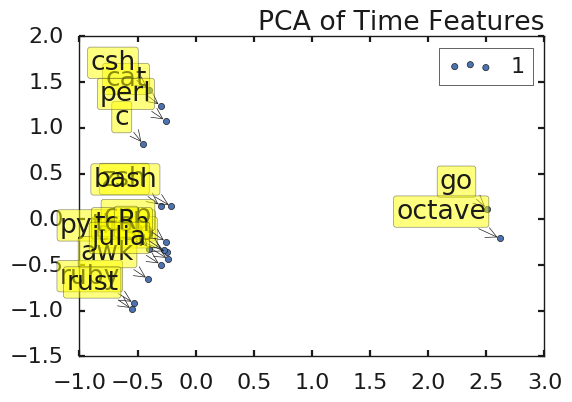

<module 'matplotlib.pyplot' from '/home/vanessa/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

In [10]:
###### PCA
pca = PCA(n_components=2) #2-dimensional PCA
transformed = pandas.DataFrame(pca.fit_transform(X_norm))
labels=X_norm.index.tolist()
transformed.index=labels
plot2d(transformed, title="PCA of Time Features", show=True)

In [13]:
data = pandas.read_csv('language-features.tsv',sep='\t',index_col=0)
data.index = [x.replace('hello-world-','') for x in data.index.tolist()]
X_norm = (data - data.min())/(data.max() - data.min())
X_norm = X_norm.fillna(0)
X_norm.transpose()
X_norm=X_norm.loc[:,X_norm.sum()!=0]
X_norm
y=X_norm.index.tolist()
X_norm

,ruby,return-code_0,0),return-code_0x555eb1587000,return-code_,NULL,PROT_READ|PROT_WRITE,MAP_PRIVATE|MAP_ANONYMOUS,-1,return-code_0x7f6bda3b5000,...,return-code_0x7f75d9cb2000,return-code_0x7f75d9c72000,return-code_0x55a9c9c23000,return-code_0x7f75d9c32000,/scif/apps/rust/scif/runscript,/scif/apps/rust/scif/environment.sh,/scif/apps/rust),return-code_20559,20559,rust executing /bin/bash /scif...
ruby,1.0,0.421053,0.380952,1.0,0.0,0.380952,0.380952,0.380952,0.380952,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
python,0.0,0.578947,0.523810,0.0,0.0,0.523810,0.523810,0.523810,0.523810,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cat,0.0,0.578947,0.571429,0.0,0.0,0.571429,0.571429,0.571429,0.571429,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
clisp,0.0,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zsh,0.0,0.473684,0.476190,0.0,0.0,0.476190,0.476190,0.476190,0.476190,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cpp,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
csh,0.0,0.052632,0.047619,0.0,0.0,0.047619,0.047619,0.047619,0.047619,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c,0.0,0.368421,0.428571,0.0,0.0,0.428571,0.428571,0.428571,0.428571,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
go,0.0,0.894737,0.476190,0.0,1.0,0.476190,0.476190,0.476190,0.476190,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
awk,0.0,0.578947,0.571429,0.0,0.0,0.571429,0.571429,0.571429,0.571429,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


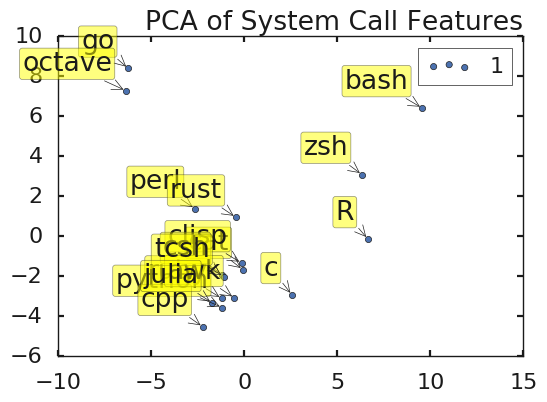

<module 'matplotlib.pyplot' from '/home/vanessa/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

In [14]:
###### PCA
pca = PCA(n_components=2) #2-dimensional PCA
transformed = pandas.DataFrame(pca.fit_transform(X_norm))
labels=X_norm.index.tolist()
transformed.index=labels
plot2d(transformed, title="PCA of System Call Features", show=True)

# Evaluation per Metric

In [16]:
data = pandas.read_csv('language-times.tsv',sep='\t',index_col=0)
data.index = [x.replace('hello-world-','') for x in data.index.tolist()]
X_norm = (data - data.min())/(data.max() - data.min())
X_norm = X_norm.fillna(0)
X_norm.transpose()
X_norm=X_norm.loc[:,X_norm.sum()!=0]
X_norm

,wait4_time,wait4_seconds,wait4_usecs/call,stat_time,stat_seconds,stat_errors,fstat_time,fstat_seconds,fstat_calls,read_time,...,lseek_time,lseek_seconds,lseek_calls,mmap_calls,munmap_calls,ioctl_calls,ioctl_errors,clone_time,clone_seconds,clone_usecs/call
ruby,0.5714,0.271186,0.266667,0.843739,0.777778,1.0,1.0,1.0,0.0,0.000000,...,0.0,0.0,0.0,0.380952,0.380952,0.0,0.0,0.0000,0.000000,0.000000
python,1.0000,0.305085,0.333333,0.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.523810,0.523810,0.0,0.0,0.0000,0.000000,0.000000
cat,0.0000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.571429,0.571429,0.0,0.0,1.0000,0.784053,0.783186
clisp,1.0000,0.254237,0.266667,0.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0000,0.000000,0.000000
zsh,0.4242,0.237288,0.266667,0.000000,0.000000,1.0,0.0,0.0,0.0,1.000000,...,0.0,0.0,0.0,0.476190,0.476190,0.0,0.0,0.0000,0.000000,0.000000
cpp,1.0000,0.254237,0.266667,0.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000
csh,0.0195,0.305085,0.333333,0.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.047619,0.047619,0.0,0.0,0.9805,1.000000,1.000000
c,0.0000,0.000000,0.000000,0.096186,1.000000,1.0,0.0,0.0,0.0,0.078383,...,0.0,0.0,0.0,0.428571,0.428571,0.0,0.0,0.9525,0.333333,0.331858
go,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.000000,...,0.0,0.0,1.0,0.476190,0.476190,1.0,1.0,0.0000,0.000000,0.000000
awk,0.7037,0.322034,0.333333,1.000000,0.888889,1.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.571429,0.571429,0.0,0.0,0.0000,0.000000,0.000000


/home/vanessa/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


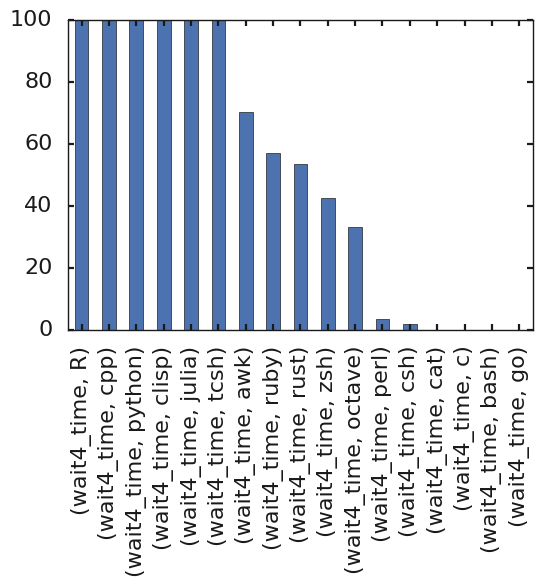

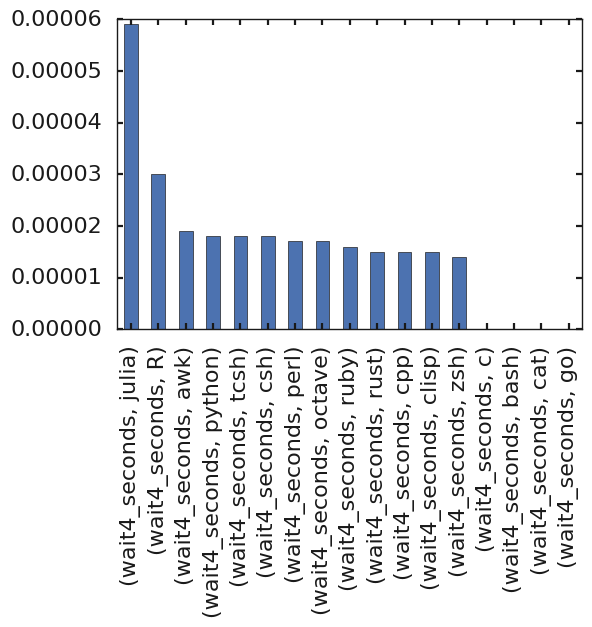

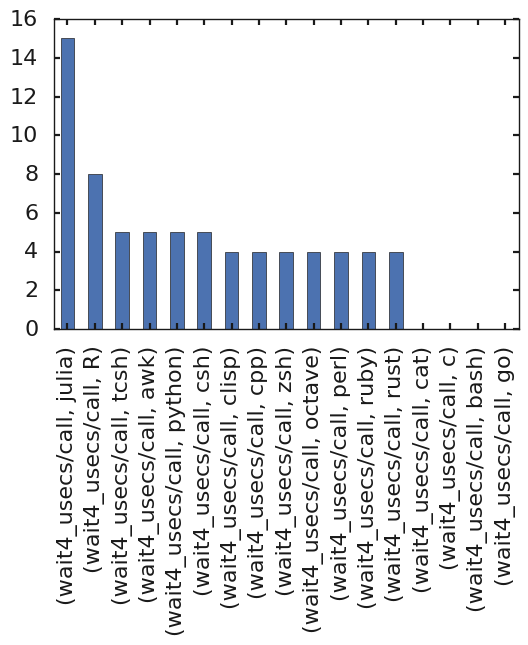

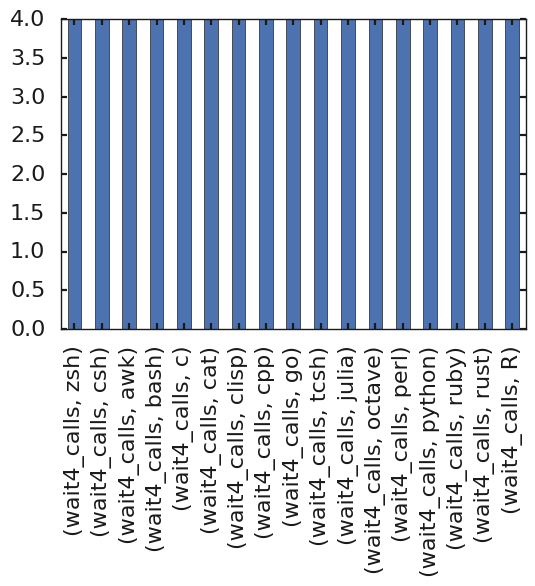

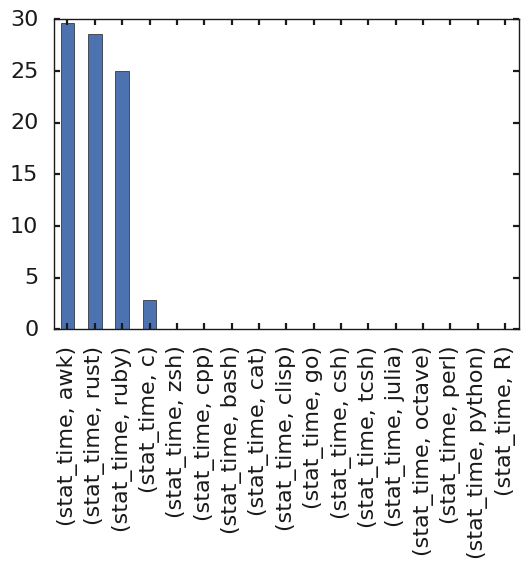

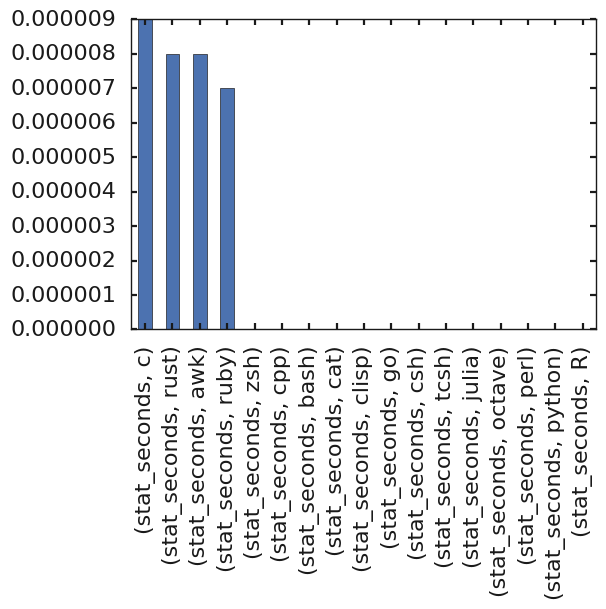

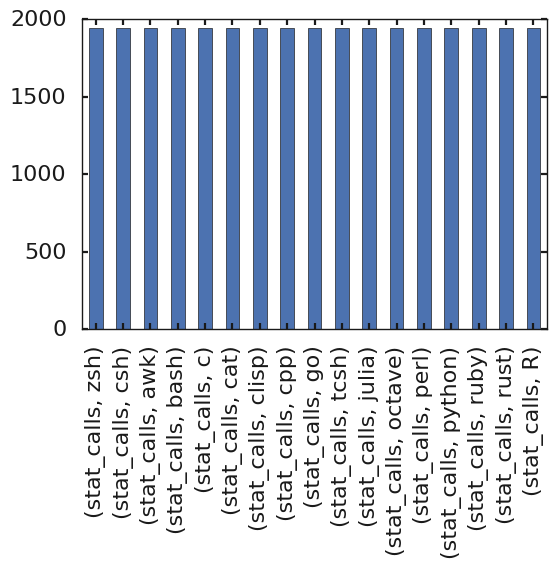

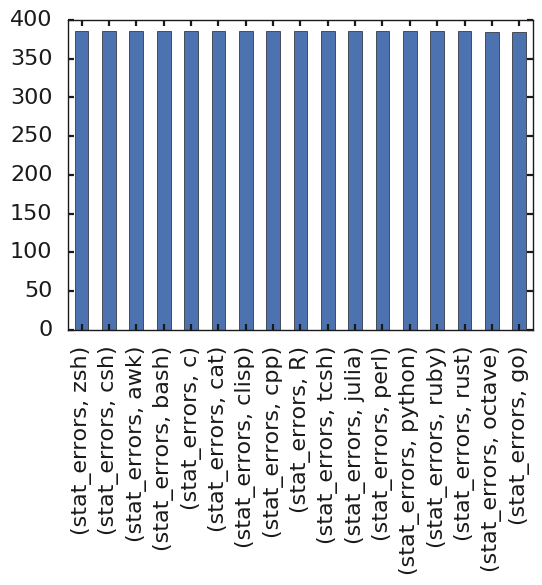

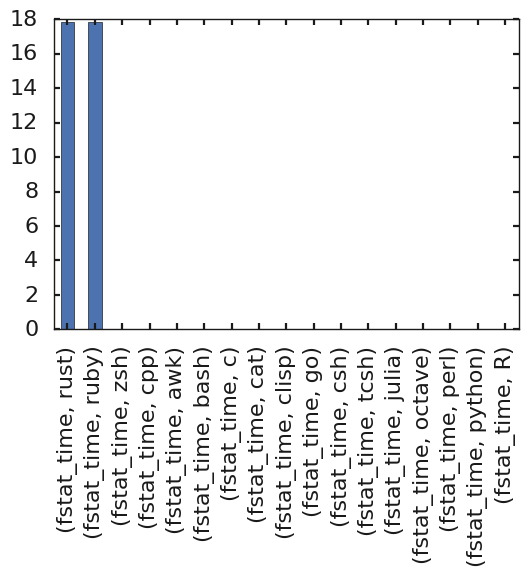

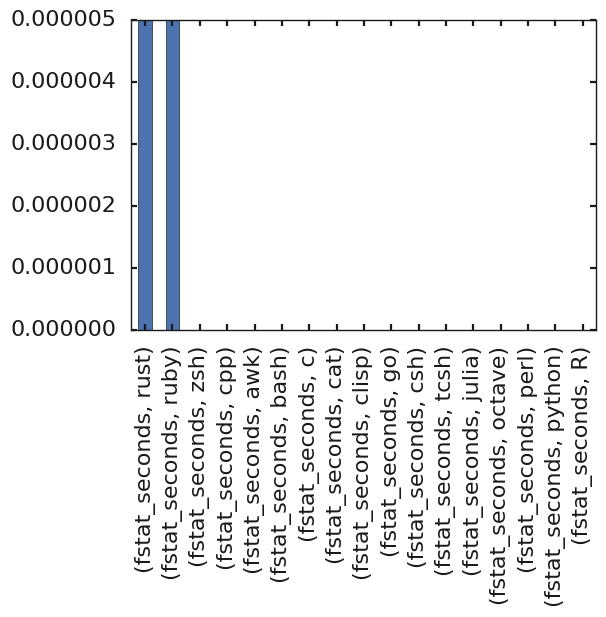

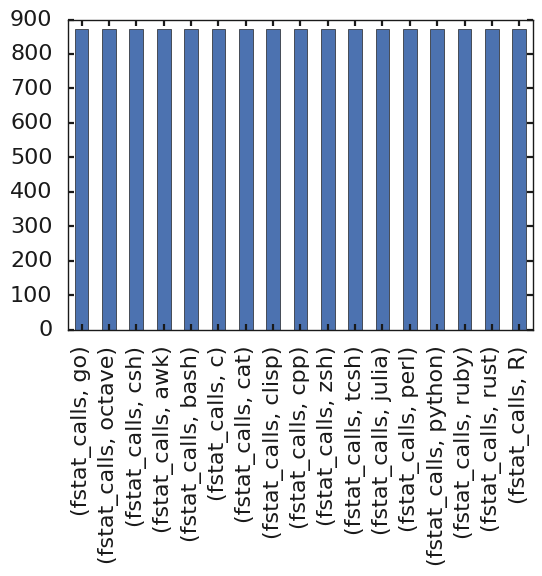

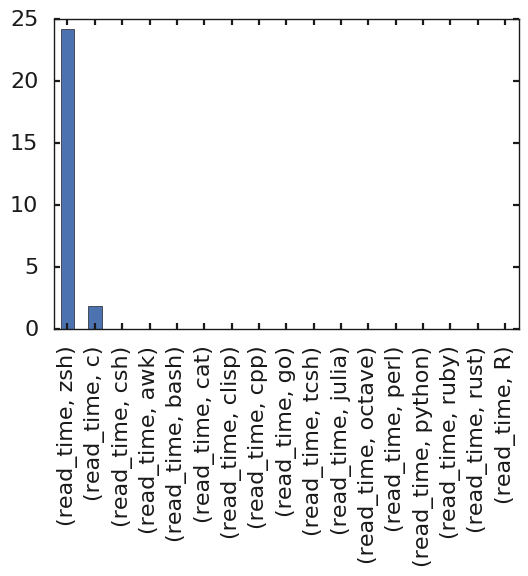

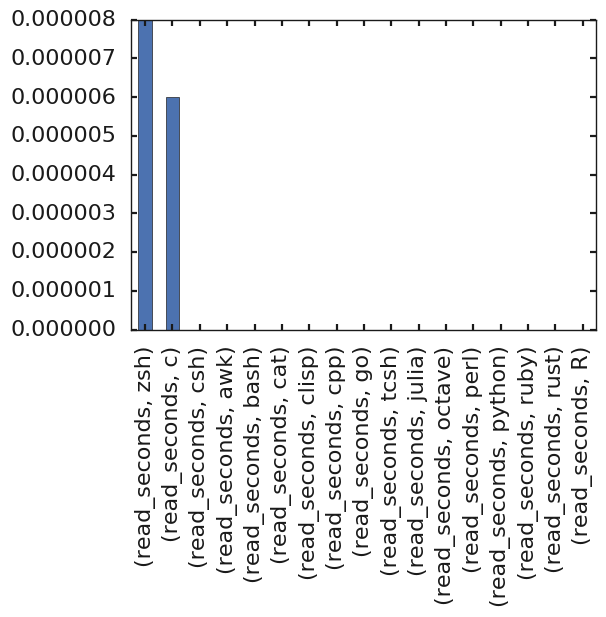

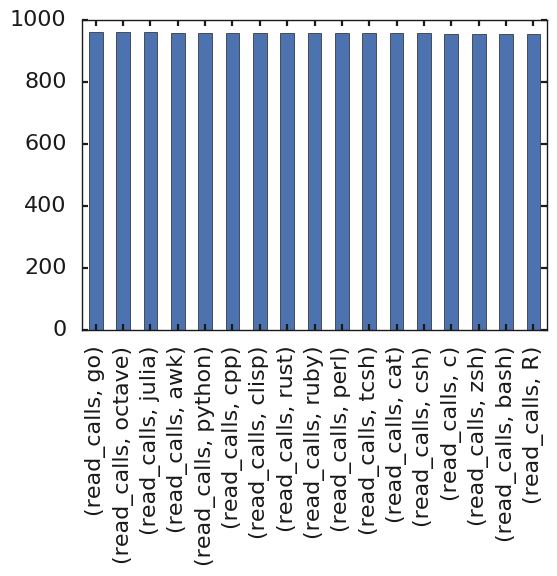

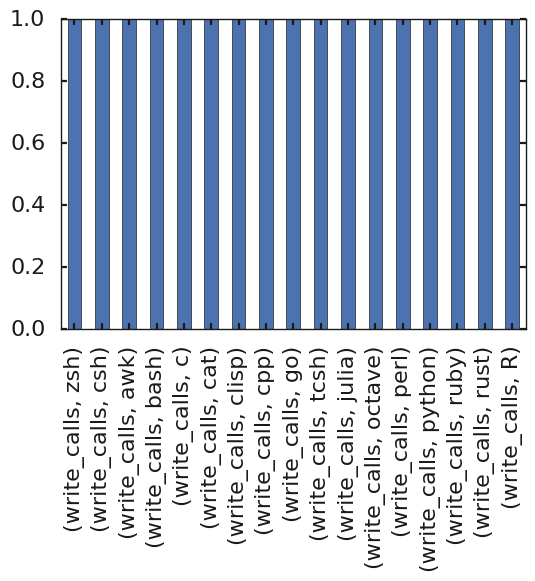

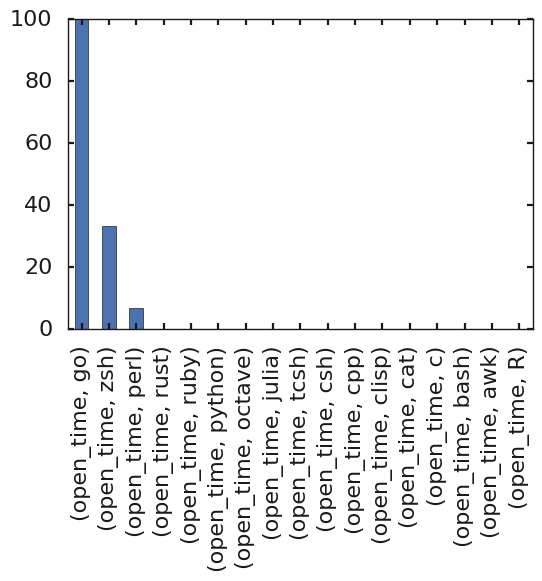

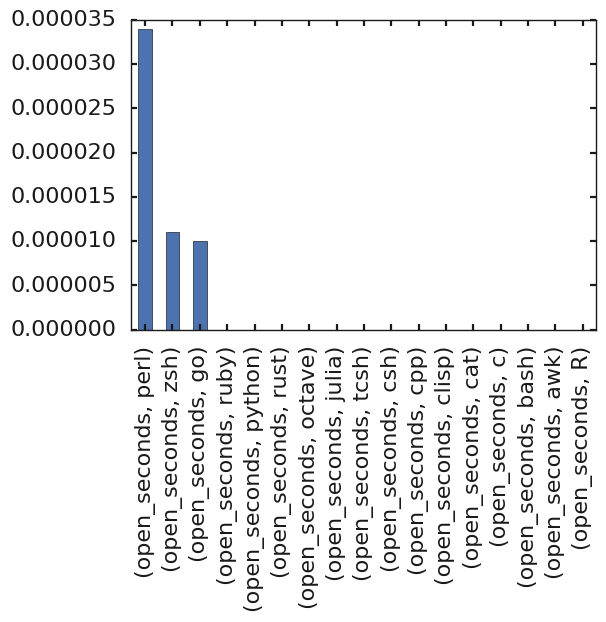

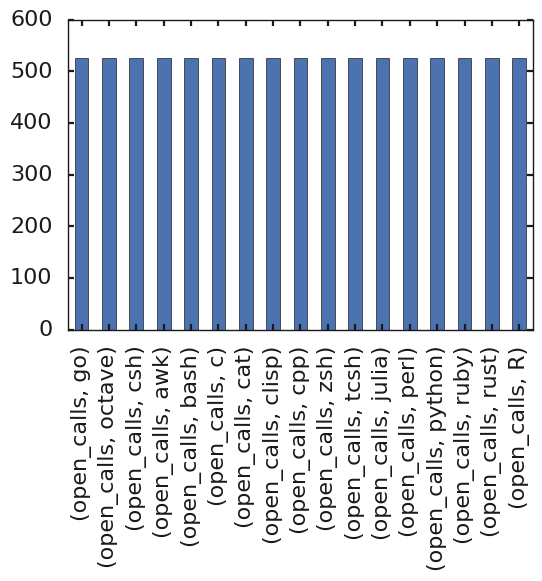

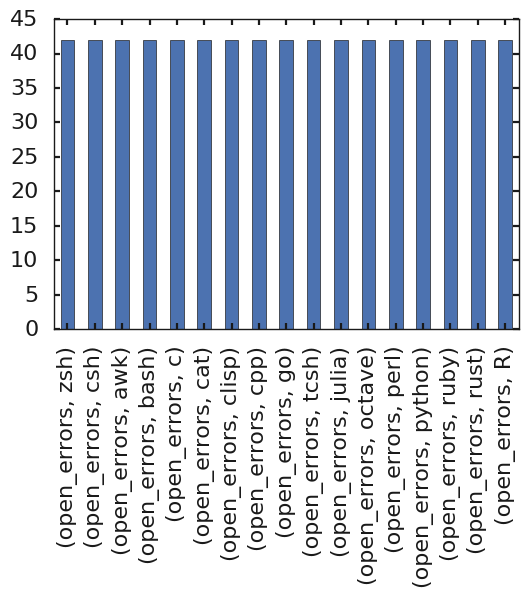

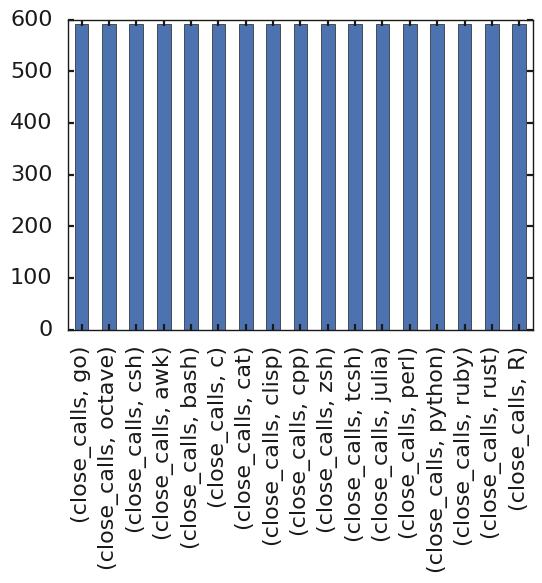

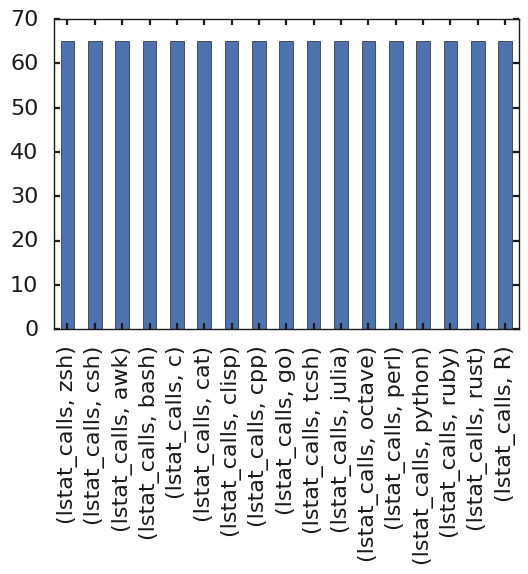

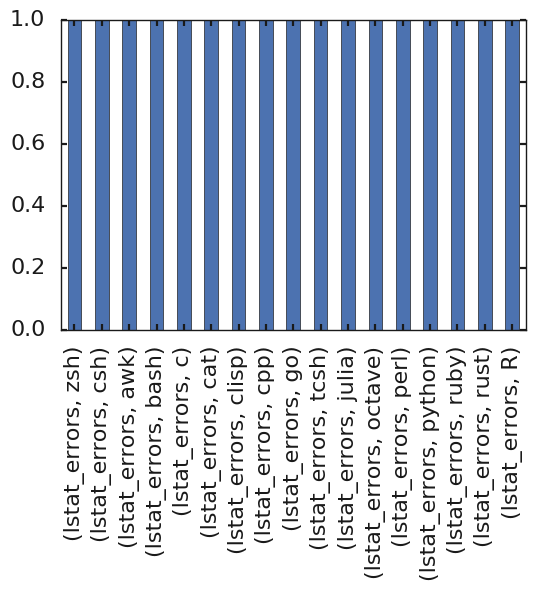

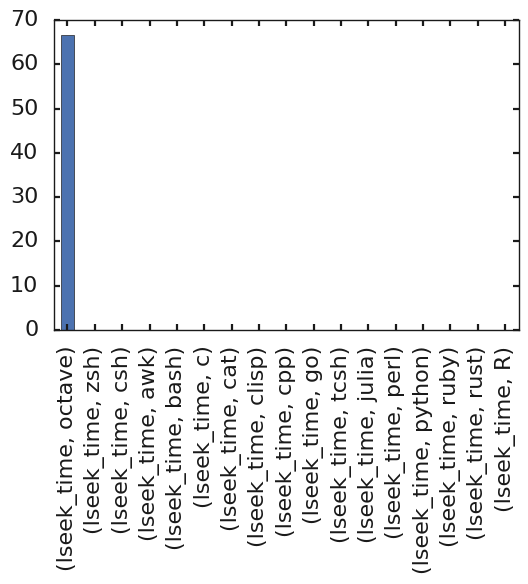

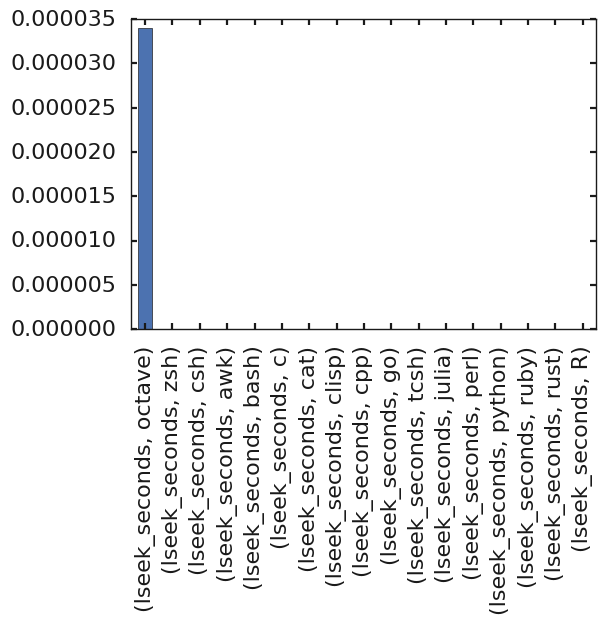

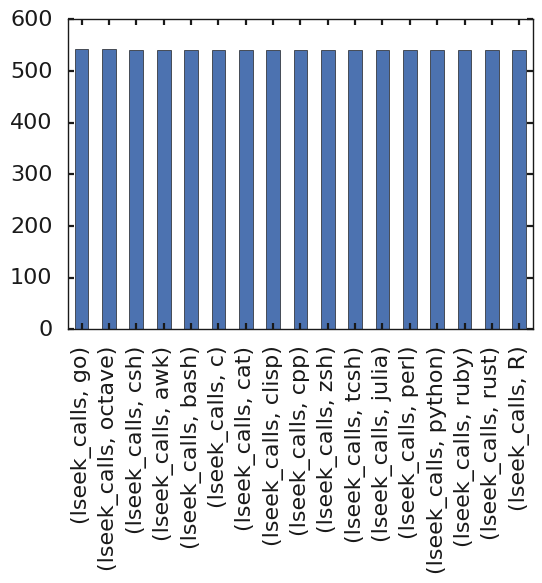

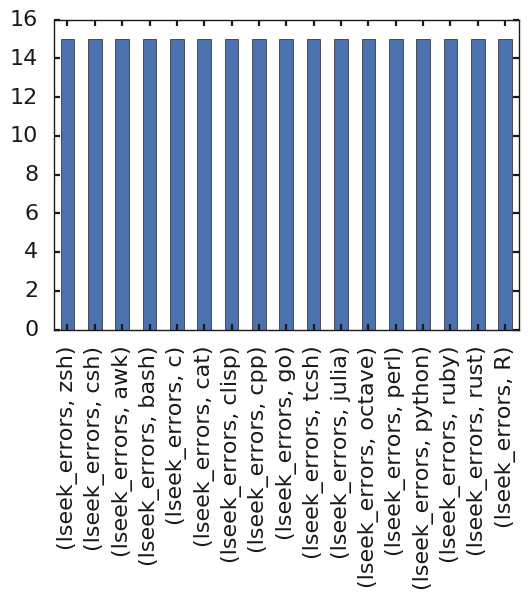

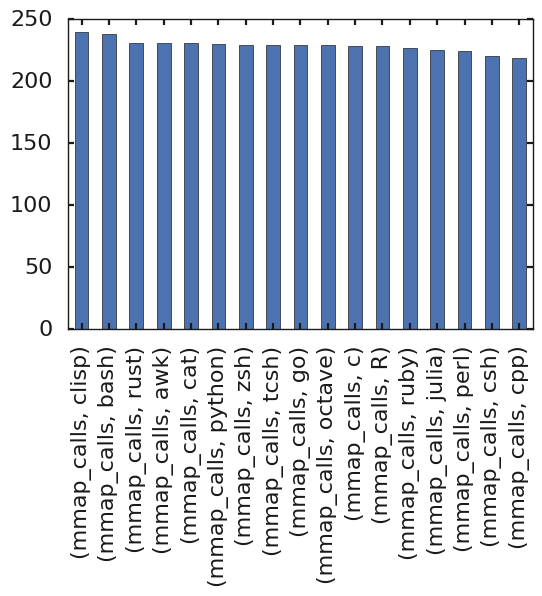

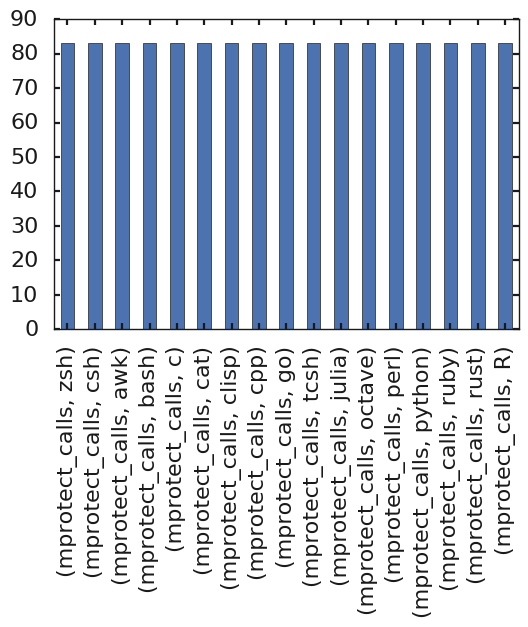

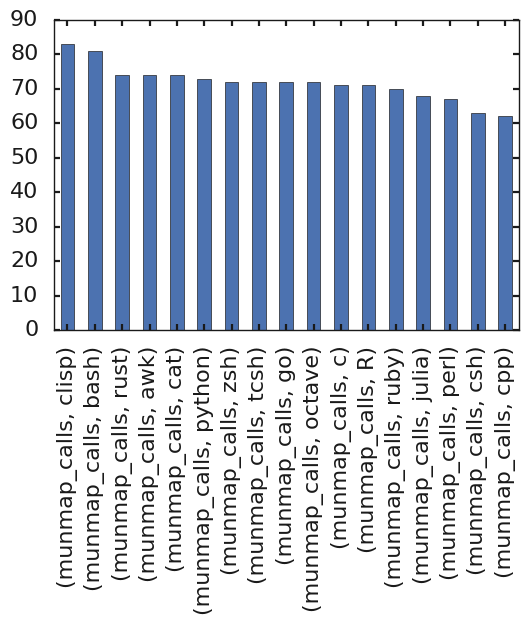

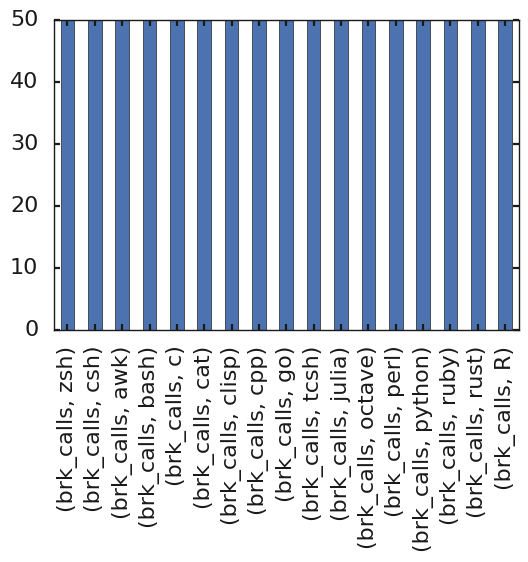

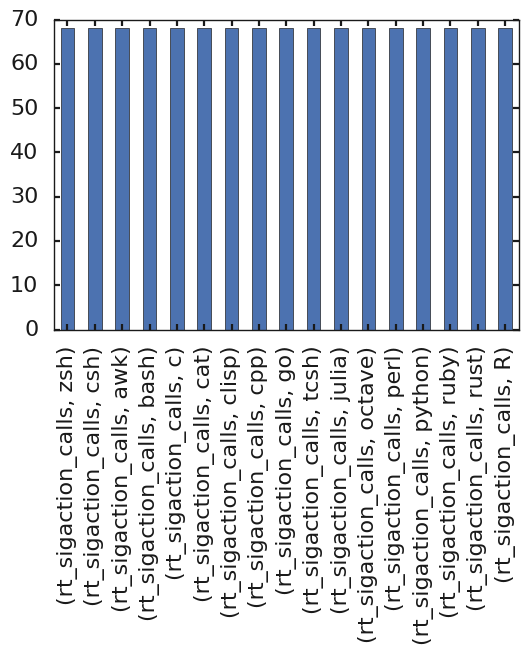

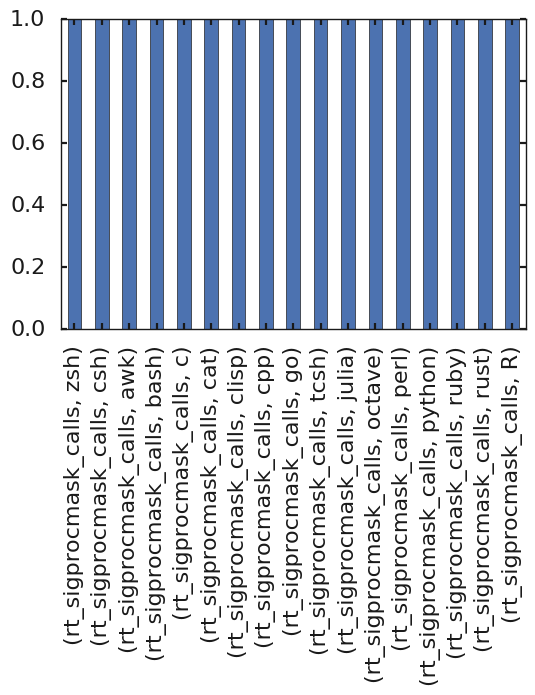

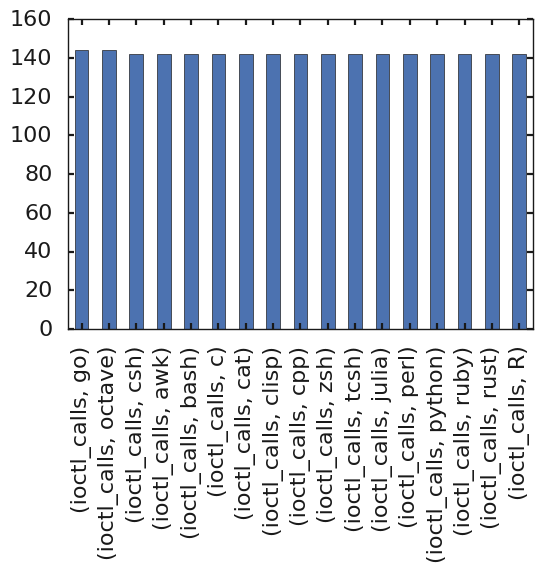

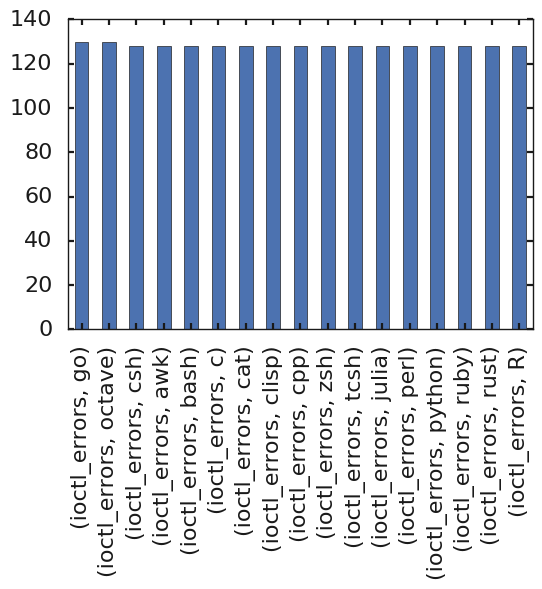

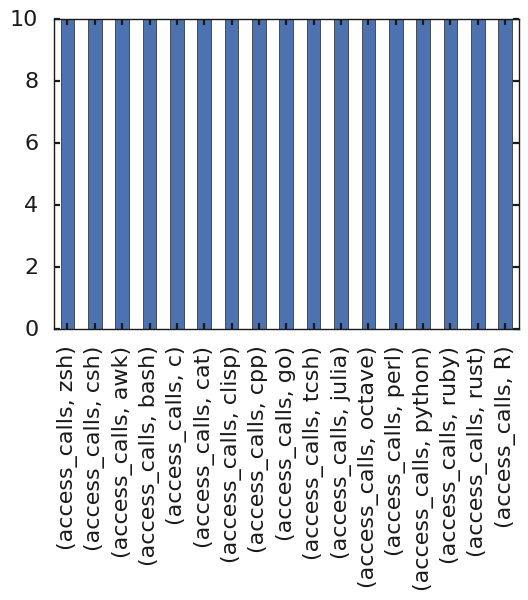

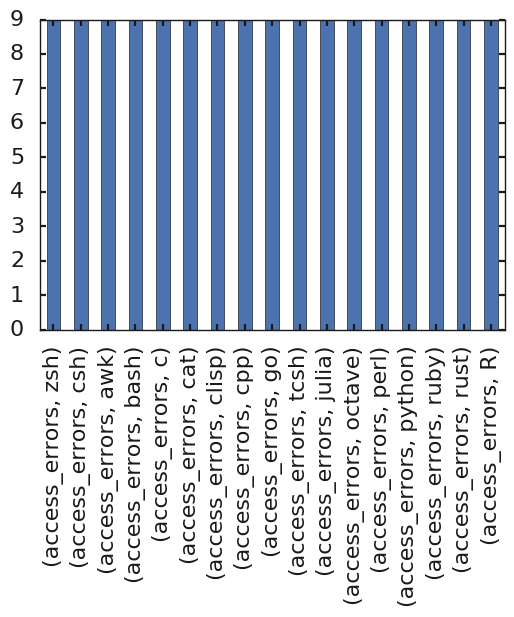

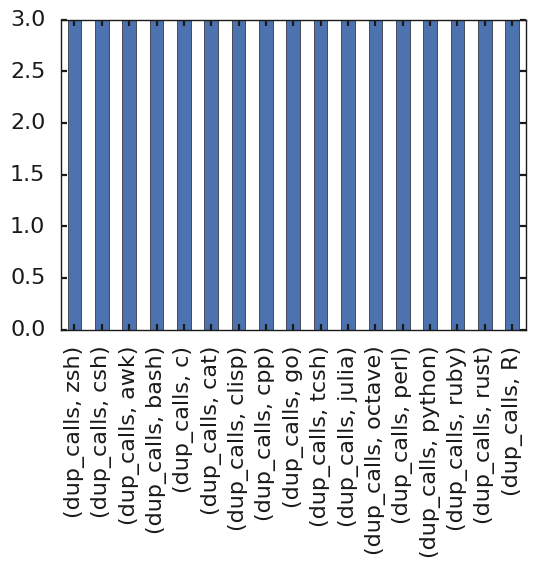

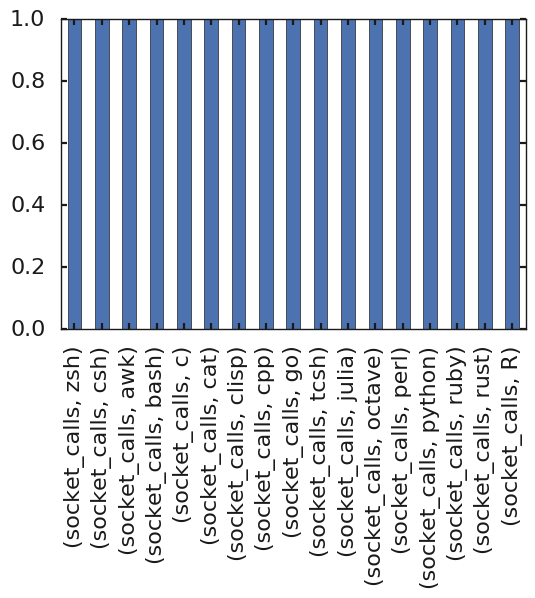

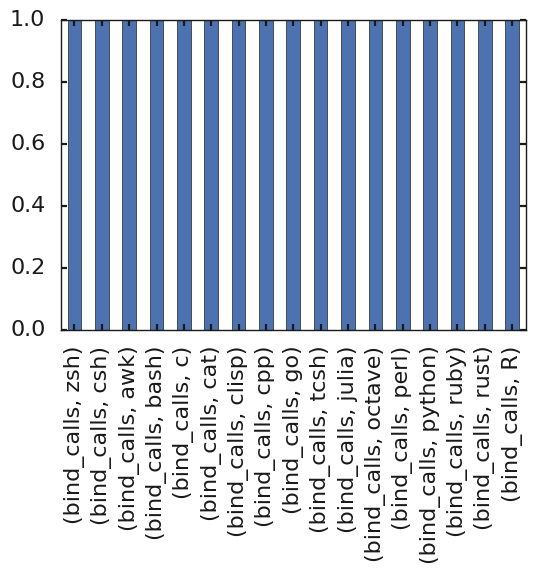

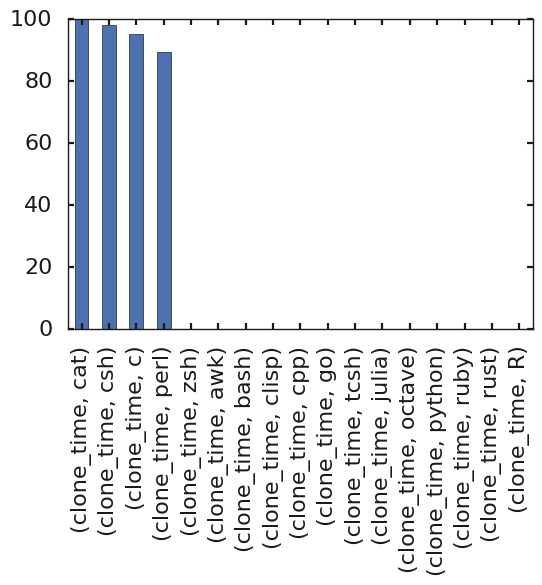

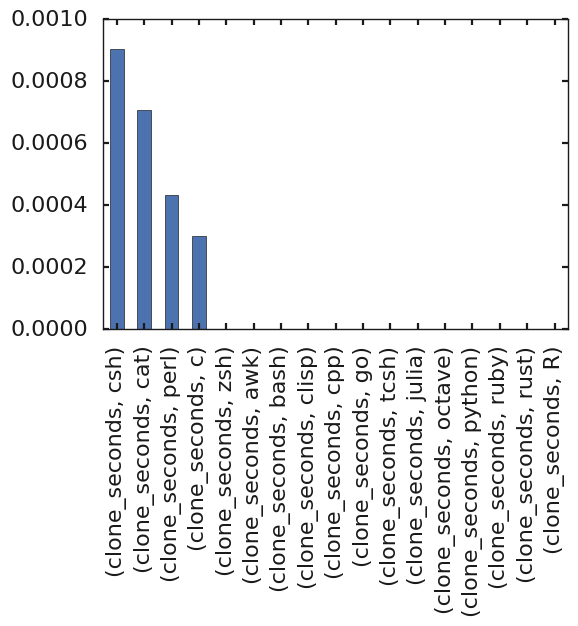

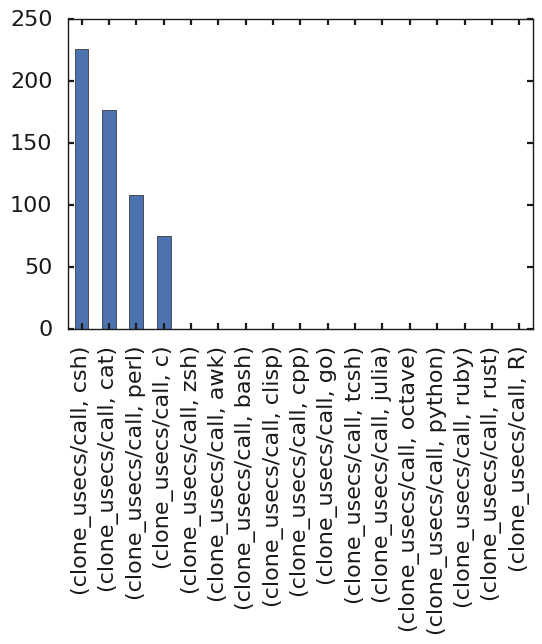

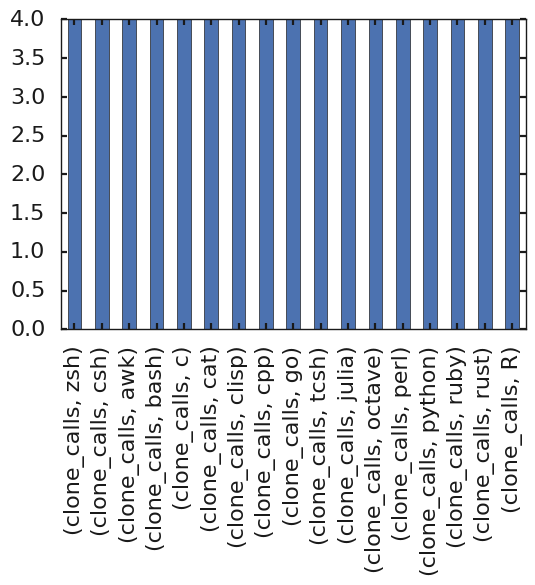

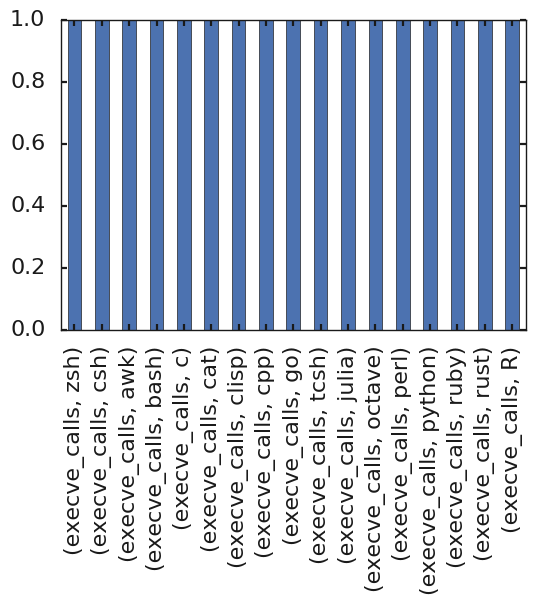

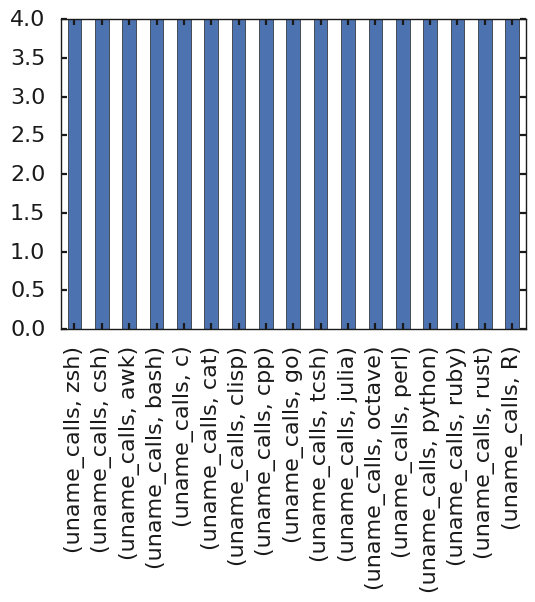

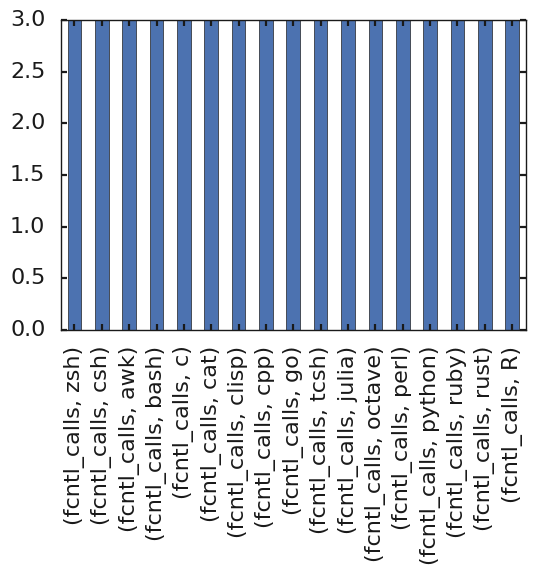

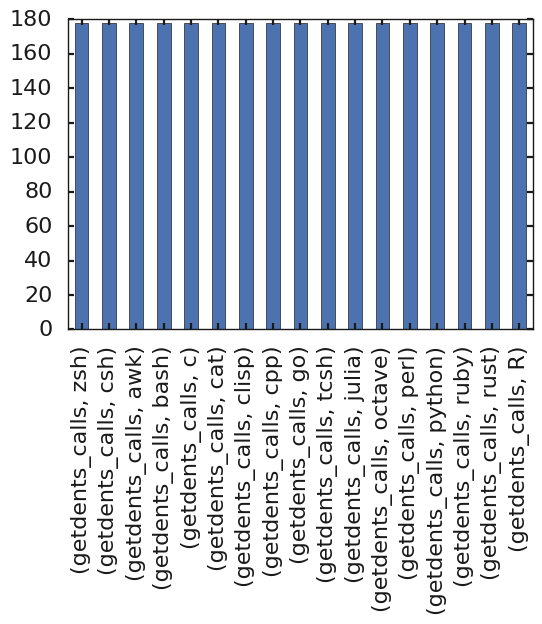

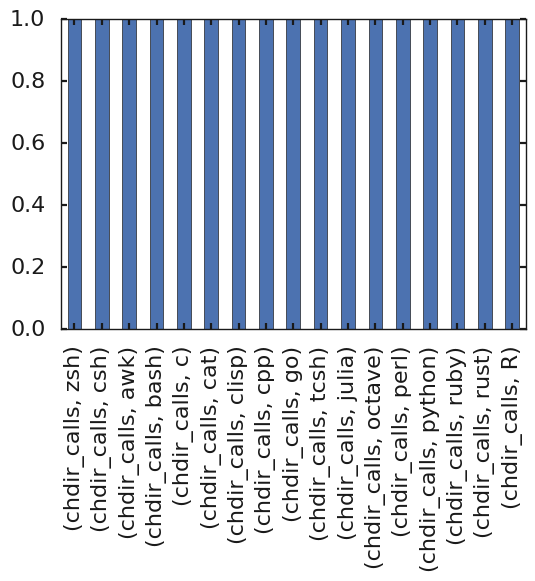

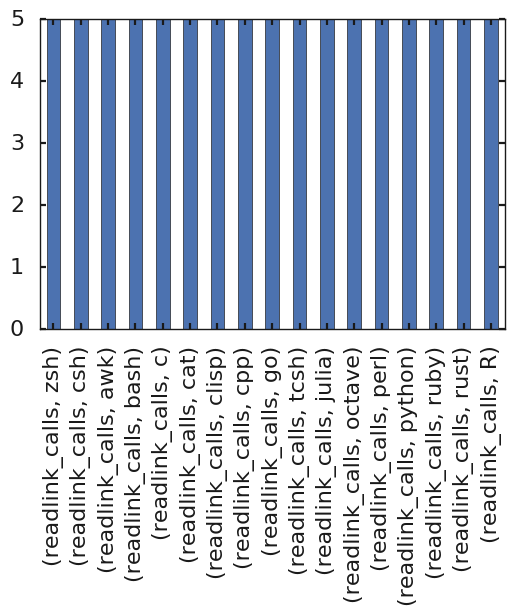

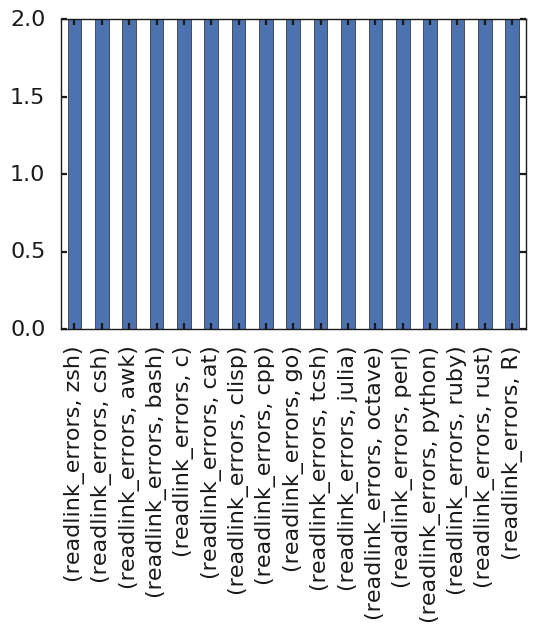

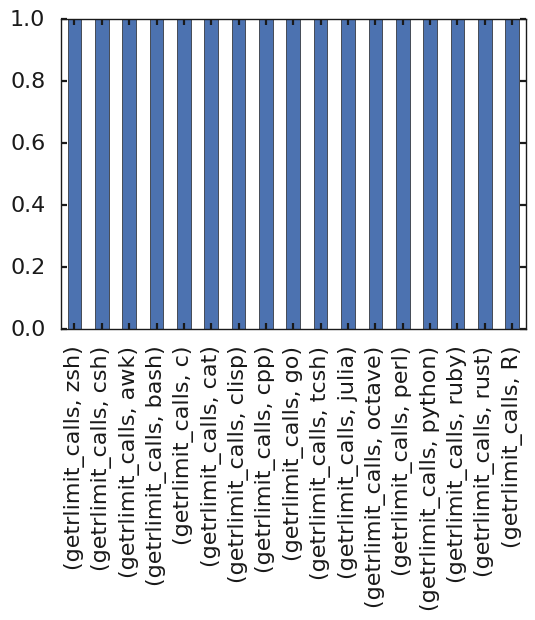

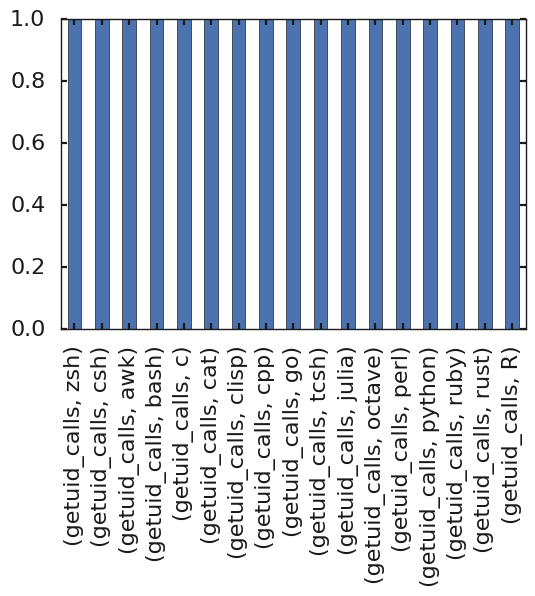

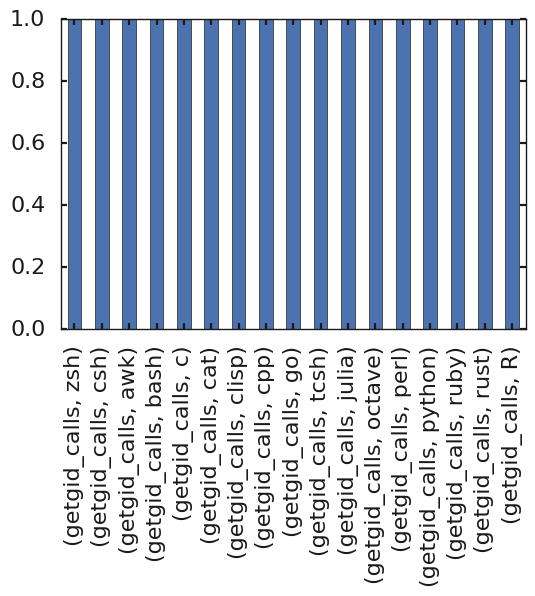

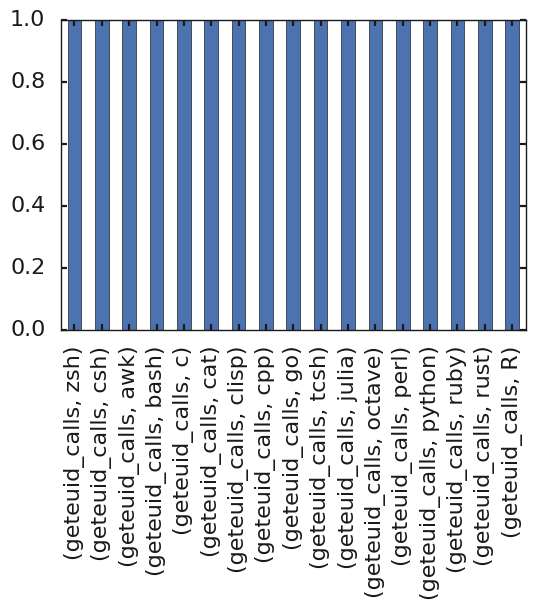

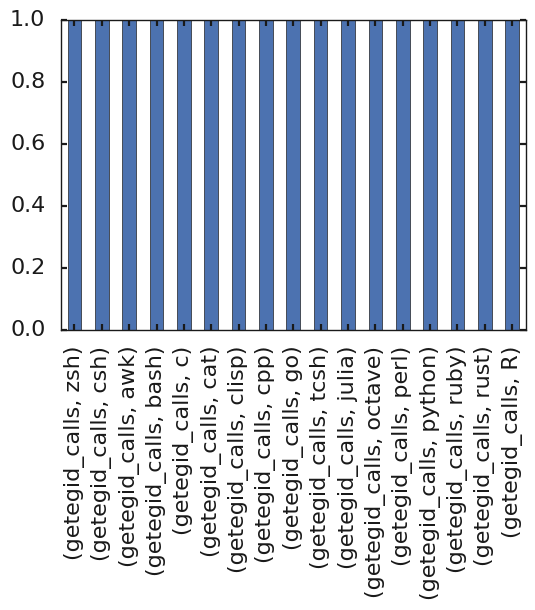

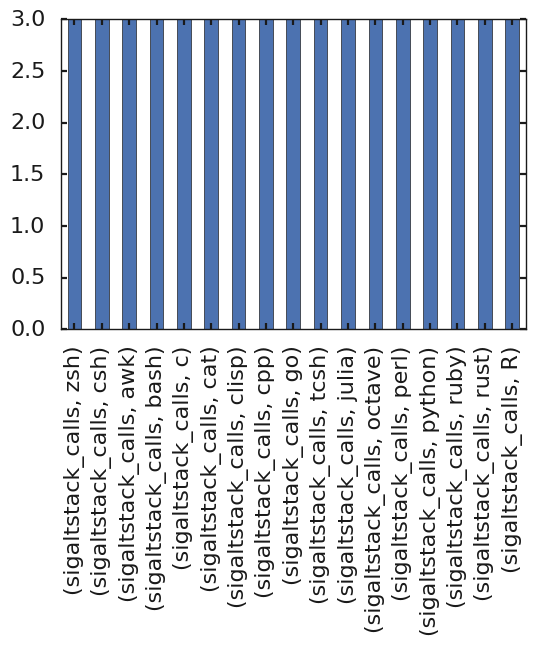

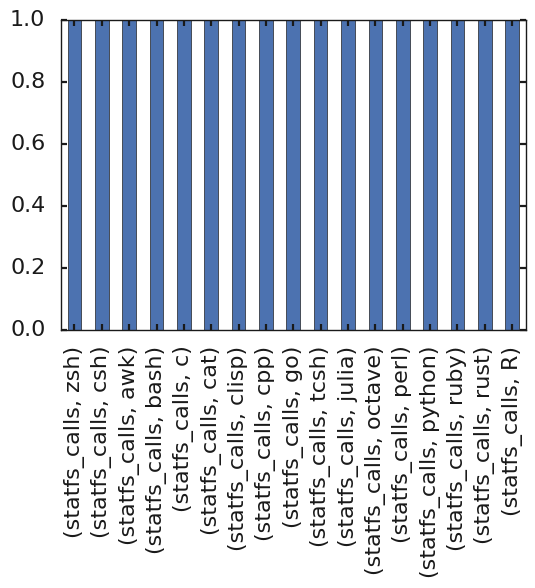

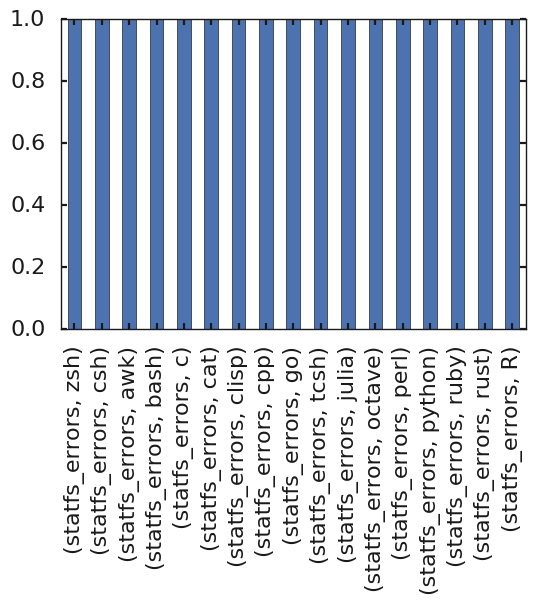

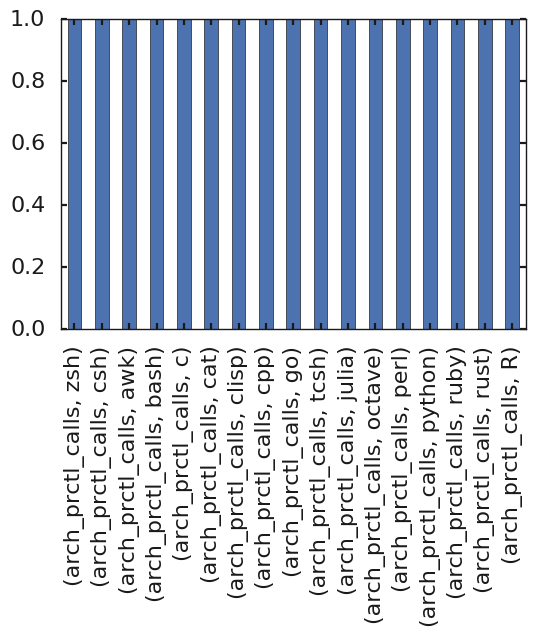

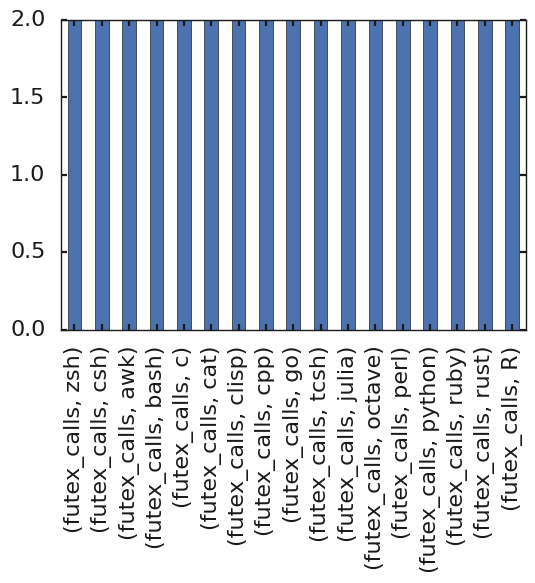

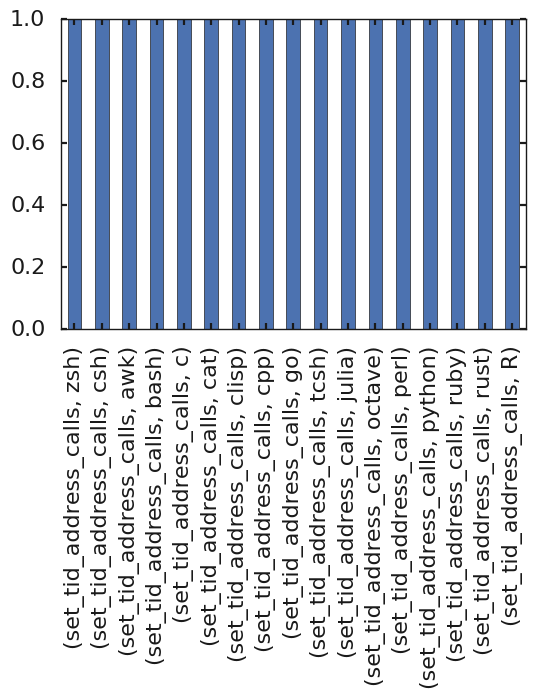

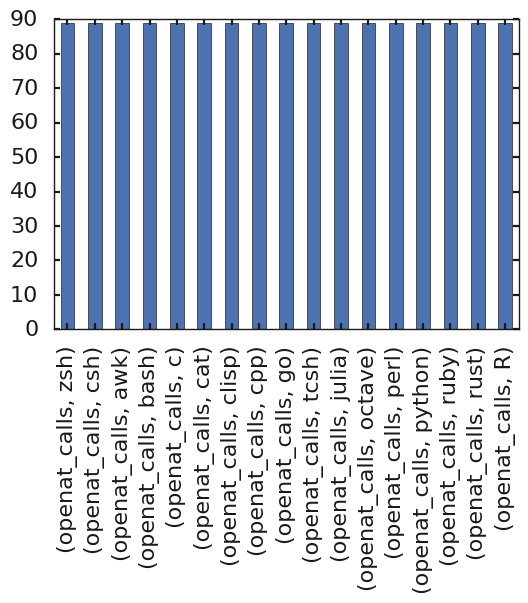

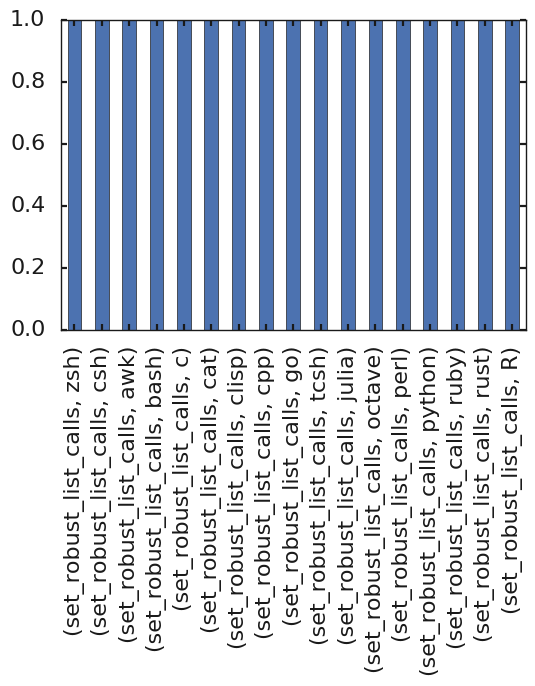

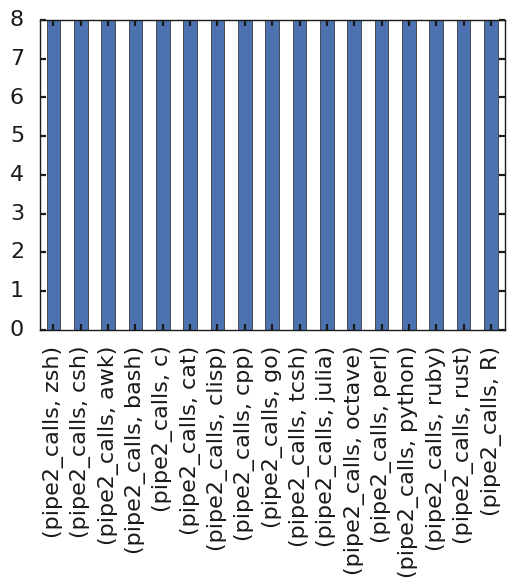

In [17]:
import matplotlib.pylab as plt
for column in data.columns:
    figure = plt.figure()
    tmp = data[column].copy()
    data_sort = tmp.groupby(level=[0]).sum().sort_values(ascending=False)
    if data_sort.sum() != 0:
        tmp = pandas.DataFrame(data_sort)
        tmp.unstack().plot.bar()